<a href="https://colab.research.google.com/github/mdnawabali/Play-Store-App-Review/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

#**Title Of The Project-- "A review of apps from the Google Play Store"**
**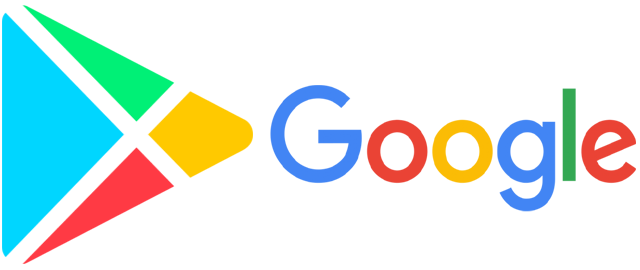**
###**We will conduct exploratory data analysis on the Google Play Store dataset for this project. Exploratory data analysis is nothing more than examining the provided data to look for patterns, trends, and assumptions. There are numerous attributes in this dataset including rating, review, size, installs, and many others.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Implementing a Dataset**

> First, let's import the necessary libraries.





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


> The most widely used visualisation libraries are matplotlib and seaborn.

> Now let's import the dataset using read_csv.





In [ ]:
#import play store dataset
play_store_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EDA project on play store app/ Play Store Data.csv')
# play_store_review=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EDA project on play store app/User Reviews.csv')



> Let's view the dataset



In [ ]:
#The top five rows of the dataframe are shown by default when using Pandas .head function.
play_store_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up




> Now let's look at the shape of the DataFrame



In [ ]:
print("There are {} rows and {} columns in the play store dataset.".format(play_store_df.shape[0],play_store_df.shape[1]))
# print("There are {} rows and {} columns in the play store review dataset.".format(play_store_review.shape[0],play_store_review.shape[1]))

There are 10841 rows and 13 columns in the play store dataset.




> We can use the isnull() function to determine whether the dataset contains any missing values or Nan values.





In [ ]:
play_store_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64



> In order to conduct exploratory data analysis on the dataset, we must first prepare it.





#Preparing and Cleaning Data
 
> Cleaning and converting raw data before processing and analysis is known as data preparation. Prior to processing, it is a crucial phase that frequently entails reformatting data, correcting data, and integrating data sets to enrich data. It involves determining which parts of the data are incomplete, incorrect, inaccurate, or irrelevant, and then replacing, changing, or deleting the soiled or coarse data.



> Wouldn't it be better if we could construct a function to obtain more valuable information about the various dataset attributes? There is also another good reason to define a function because it will be reusable and we will use it often in the future.



In [ ]:
# Defining a function
def complete_info():
    null = pd.DataFrame(index=play_store_df.columns)
    null['data_type'] = play_store_df.dtypes
    null['null_count'] = play_store_df.isnull().sum()
    null['unique_count'] = play_store_df.nunique()
    return null

In [ ]:
# Let’s call the function and see what it returns:
complete_info()

,data_type,null_count,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,1474,40
Reviews,object,0,6002
Size,object,0,462
Installs,object,0,22
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


###App



> We can now begin the process of cleaning the data. Let's start with the column "App" and see if there are any duplicate values present.



In [ ]:
print("Number of Unique App names = ", len(play_store_df['App'].unique()))
print("NUMBER of the Total App name = ", play_store_df.shape[0])
print("Duplicate Apps = ",len(play_store_df['App'])- len(play_store_df['App'].unique()))

Number of Unique App names =  9660
NUMBER of the Total App name =  10841
Duplicate Apps =  1181


In [ ]:
#Examining the appearance of the duplicate value
play_store_df[play_store_df['App'] == 'Coloring book moana']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2033,Coloring book moana,FAMILY,3.9,974,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up




> Therefore, it is preferable to eliminate all duplicate values and keep the dataset clean.



In [ ]:
play_store_df.drop_duplicates(subset = 'App', keep = 'first' ,inplace = True)

###Type

> We may now move on to the "Type" column:



In [ ]:
# check for unique set of values in the column 'type'
play_store_df.Type.unique()

array(['Free', 'Paid', nan, '0'], dtype=object)



> There is 0 and null value, let’s change them to free.



In [ ]:
#changing the values to 'free'
play_store_df['Type'].replace(to_replace=['0'], value=['Free'],inplace=True)
play_store_df['Type'].fillna('Free', inplace=True)

###Content Rating

> We can now turn our attention to the column 'Content Rating'.



In [ ]:
#checking for null values
play_store_df[play_store_df['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,Free,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
#comparing the data with the nearby rows.
play_store_df.loc[10465:10477, :]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10465,Portable Wi-Fi hotspot Free,COMMUNICATION,4.0,1711,2.1M,"100,000+",Free,0,Everyone,Communication,"January 11, 2018",1.2.5.4-11,2.3 and up
10466,Wi-Fi Networks,PRODUCTIVITY,4.2,115,1.4M,"10,000+",Free,0,Everyone,Productivity,"October 5, 2015",1.4,4.1 and up
10467,FI CFL,FINANCE,3.7,112,3.9M,"10,000+",Free,0,Everyone,Finance,"July 5, 2018",1.1.1,5.0 and up
10468,Tassa.fi Finland,LIFESTYLE,3.6,346,7.5M,"50,000+",Free,0,Everyone,Lifestyle,"May 22, 2018",5.5,4.0 and up
10469,TownWiFi | Wi-Fi Everywhere,COMMUNICATION,3.9,2372,58M,"500,000+",Free,0,Everyone,Communication,"August 2, 2018",4.2.1,4.2 and up
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,Free,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up




> As can be seen from the command above, all of the current column values are being replaced with their previous columns in row 10472 due to a missing value in the category column.



In [ ]:
#Dropping the row containing null values in the column 'Content Rating'
play_store_df.dropna(subset = ['Content Rating'], inplace=True)

In [ ]:
complete_info()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,1463,39
Reviews,object,0,5330
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,118


###Rating

> The Rating column, which has a total of 1463 missing values, can now be fixed. Replacing the missing values with the Modevalue of that entire column.



In [ ]:
#Finding the mode value and replacing with the null values present.
modeValueRating = play_store_df['Rating'].mode()
print(f' The mode value is: {modeValueRating[0]}')
play_store_df['Rating'].fillna(value=modeValueRating[0], inplace = True)
complete_info()

 The mode value is: 4.3


,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,5330
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,118




> We have a few unnecessary columns that won't be very helpful when we're doing the analysis. Let's eliminate those columns.



In [22]:
#Eliminatting the collumns that are not necessary.
play_store_df.drop(['Current Ver','Last Updated', 'Android Ver'], axis=1, inplace=True)

KeyError: ignored

In [23]:
complete_info()

,data_type,null_count,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,5330
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,118


> The null count for every column is zero, indicating that there are no longer any missing entries in the data frame.

#Data preparation
> The datatype for columns like Reviews, Size, Installs, and price should be an int or float, but we can see that they are of object type here. Let's change them to the appropriate type.



###Reviews

In [24]:
#converting the column Reviews to type 'int'
play_store_df['Reviews'] = play_store_df.Reviews.astype(int)

###Size

> It also includes the values "Varies with device", 'M' and 'k' which are present in the column 'size' as string in the value type. The KB and MB size scales would be messed up if the 'M' and 'K' were left out. Consequently, we convert KBs to MBs. Below is a method of doing this.


In [25]:
#Removing the +Symbol:
play_store_df['Size'] = play_store_df.Size.apply(lambda x: x.strip('+'))

In [26]:
#Removing the , symbol:
play_store_df['Size'] = play_store_df.Size.apply(lambda x: x.replace(',', ''))

In [33]:
#removing M and k from values, also coverting KB into MB 
play_store_df['Size'] =play_store_df['Size'].apply(lambda x: x.replace('M', '') if 'M' in str(x) else x )
play_store_df['Size'] = play_store_df['Size'].apply(lambda x: float(x.replace('k', ''))/1024 if 'k' in str(x) else x)

In [39]:
#Replacing the Varies with device value with Nan :
play_store_df['Size'] = play_store_df.Size.replace('Varies with device', np.NaN)



> We need to do something with the set of Nan values data since we converted the Varies with device value to Nan. Since some apps' sizes will be too huge and others excessively small, it would be best to remove the rows of the column Size that contain Nanvalues rather than attempt to replace them with mean or mode.



In [40]:
# Removing the rows which containing "Varies with device"
play_store_df.dropna(subset = ['Size'], inplace=True)

In [41]:
#Now, finally converting all these values to numeric type:
play_store_df['Size'] = pd.to_numeric(play_store_df['Size']) 

###Installs

In [42]:
#check for unique values
play_store_df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '50+', '100+', '500+', '10+', '1+', '5+',
       '1,000,000,000+', '0+'], dtype=object)



> I will now convert this column to a float. The "," value needs to be changed, and the "+" sign needs to be removed.




In [43]:
#Removing the "+" sign and changing the sign ","
play_store_df['Installs'] = play_store_df.Installs.apply(lambda x: x.strip('+'))
play_store_df['Installs'] = play_store_df.Installs.apply(lambda x: x.replace(',', ''))

In [44]:
#convert it from string type to numeric type,
play_store_df['Installs'] = pd.to_numeric(play_store_df['Installs'])

###Price


> So, now we are only left with the Price column



In [47]:
#checking for value count
play_store_df['Price'].value_counts()

0          7747
$0.99       142
$2.99       110
$1.99        66
$4.99        63
           ... 
$18.99        1
$389.99       1
$19.90        1
$1.75         1
$1.04         1
Name: Price, Length: 87, dtype: int64

In [48]:
#Removing "$" sign
play_store_df['Price'] = play_store_df.Price.apply(lambda x: x.strip('$'))

In [50]:
# converting to Numeric type
play_store_df['Price'] = pd.to_numeric(play_store_df['Price'])



> Lets take a final look at our DataFrame



In [51]:
#calling the function
complete_info()

,data_type,null_count,unique_count
App,object,0,8432
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,4304
Size,float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,float64,0,87
Content Rating,object,0,6
Genres,object,0,115


In [53]:
play_store_df.shape

(8432, 10)



> There are 8434 rows and 10 columns left in the data frame after the dataset has been cleaned up by removing any unneeded rows and columns containing Null Values and garbage data.



#Exploratory Analysis and Visualization